# Exploratory Data Analysis
The functions used in this notebook are from *ETProject/EDA*.

## Notebook preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from pathlib import Path
import os
import yaml

# Changing path to the main directory
main_dir_path = Path.cwd().parents[0]
os.chdir(main_dir_path)

from ETProject.EDA import *

In [ ]:
# Loading data

# Station definitions
path = 'processed_data/station_definitions.csv'
st_df = pd.read_csv(path)
st_df = gpd.GeoDataFrame(st_df, geometry=gpd.points_from_xy(st_df['longitude'], st_df['latitude']), crs='EPSG:4326')

# ET0 data
path = 'processed_data/et_data.csv'
et_df = pd.read_csv(path)

# Map data
path = 'processed_data/map_data/tr_regions_mod.geojson'
tr_geo = gpd.read_file(path, crs='EPSG:4326')

## Spatial distribution of data and stations

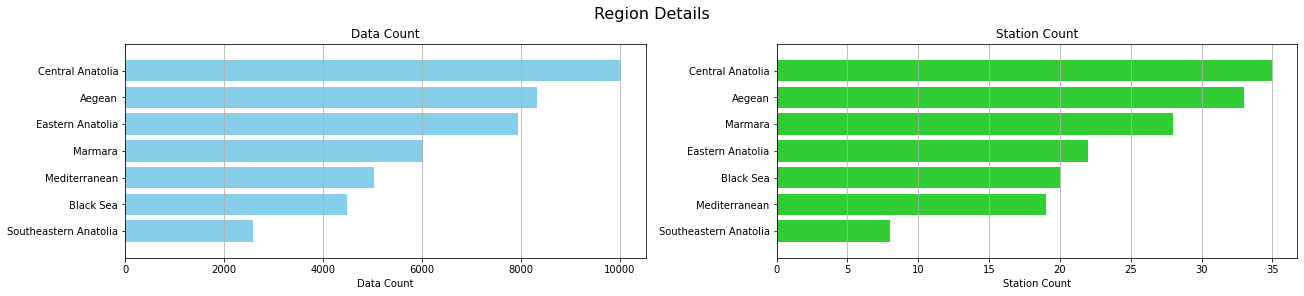

In [3]:
plot_data_station_count_by_region(st_df, et_df, figsize = (18, 4))
plt.show()

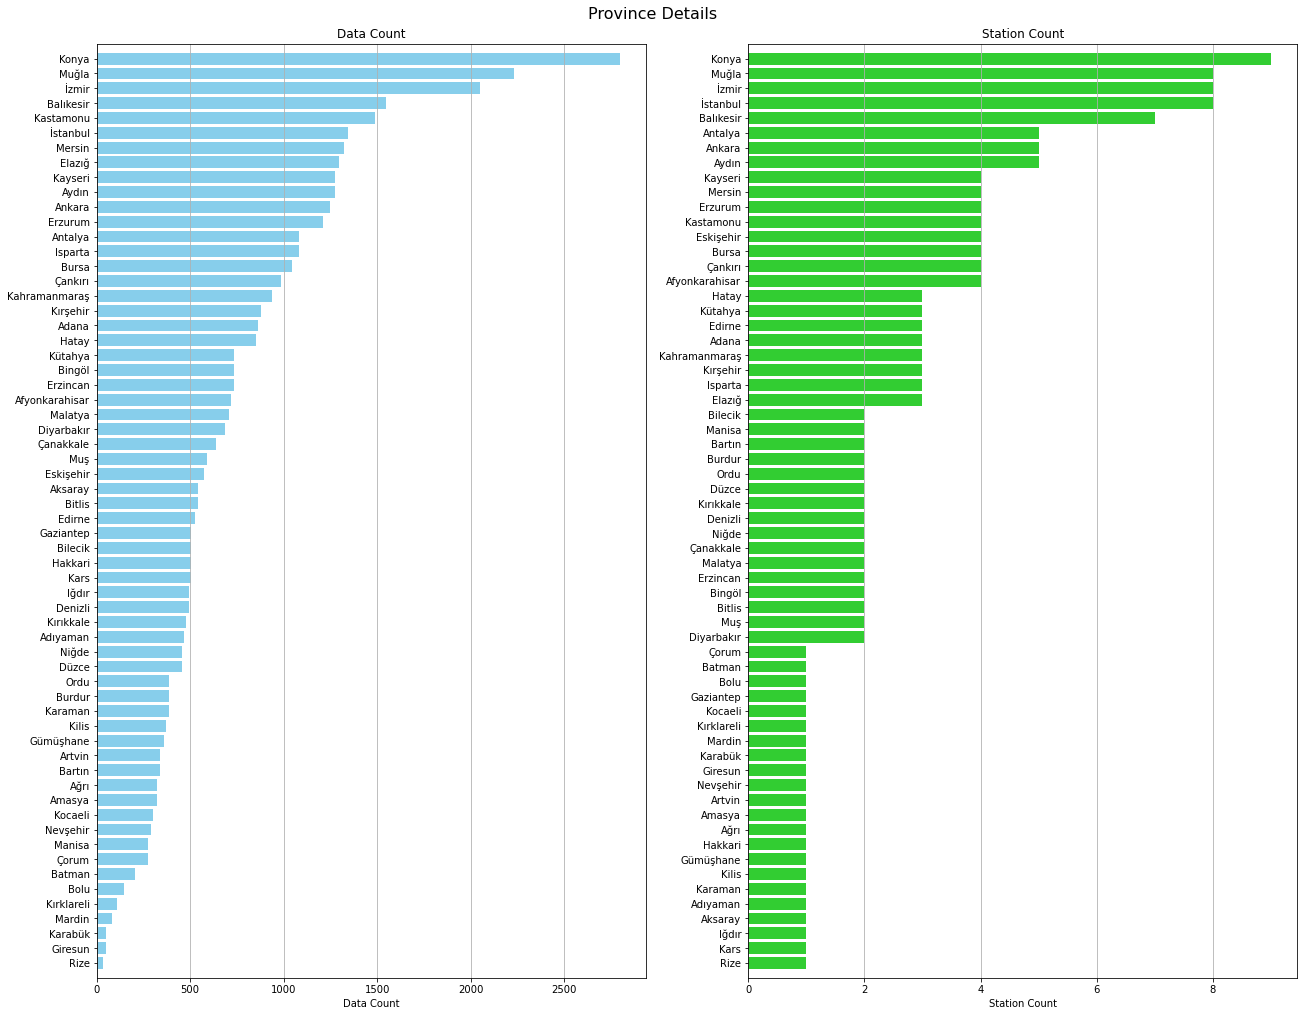

In [5]:
plot_data_station_count_by_region(st_df, et_df, by='province', figsize = (18, 14))
plt.show()

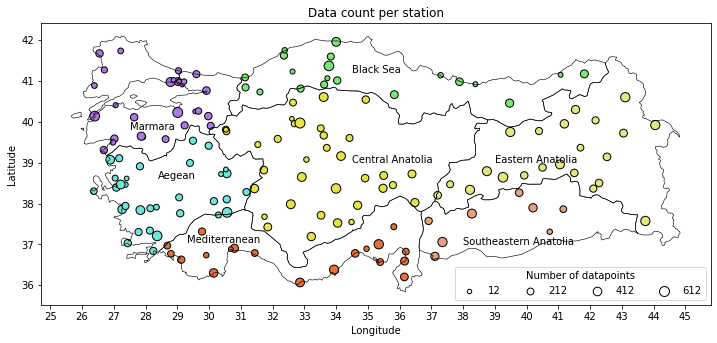

In [9]:
plot_station_map(st_df, et_df, tr_geo)

## Temporal distribution of data

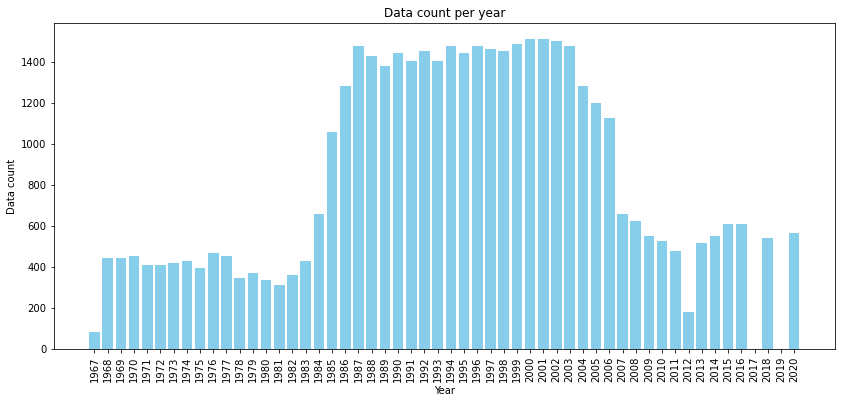

In [12]:
fig, ax = plt.subplots(figsize=(14, 6))
graph_data = et_df.groupby('year')[['st_num']].count().reset_index()
ax.bar(x='year', height='st_num', data=graph_data, color='skyblue')

# Annotation
ax.set_xlabel('Year')
ax.set_ylabel('Data count')
ax.set_title('Data count per year')

start_year = graph_data['year'].min()
end_year = graph_data['year'].max()
xticks = np.arange(start_year, end_year+1)
ax.set_xticks(xticks)
ax.set_xticklabels(list(map(str, xticks)), rotation=90)
plt.show()

## Exploring variables

### Variable correlations

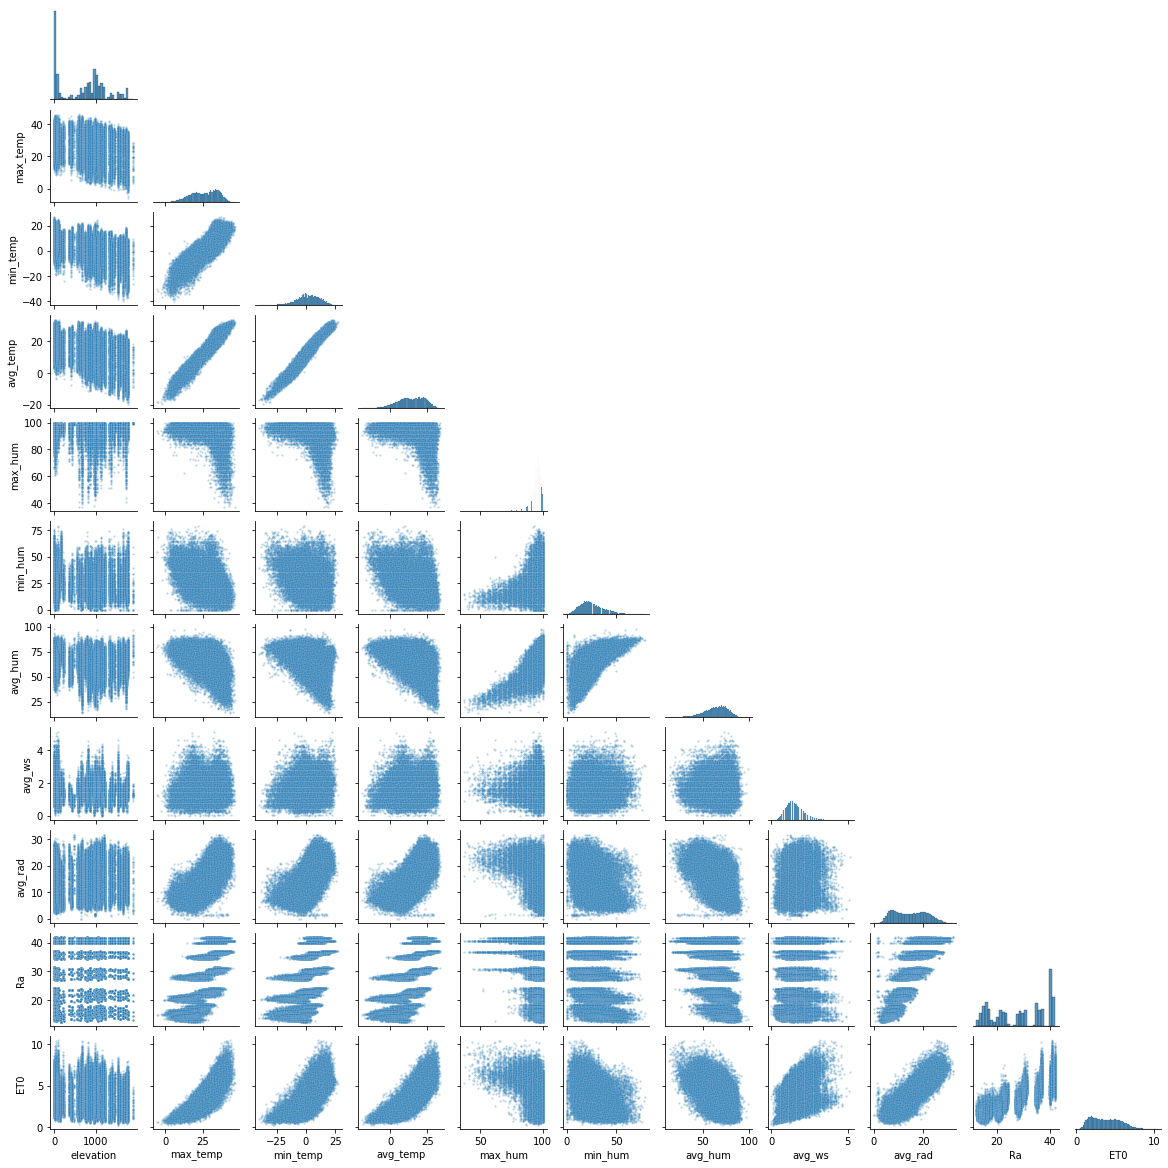

In [13]:
variables = [ 'elevation', 'max_temp', 'min_temp', 'avg_temp', 'max_hum', 'min_hum', 'avg_hum',
       'avg_ws', 'avg_rad', 'Ra', 'ET0']

ax = sns.pairplot(data=et_df, vars=variables, plot_kws={'alpha': 0.3, 's': 5}, corner=True, height=1.5)

plt.show()

Plotting month of the year with other variables

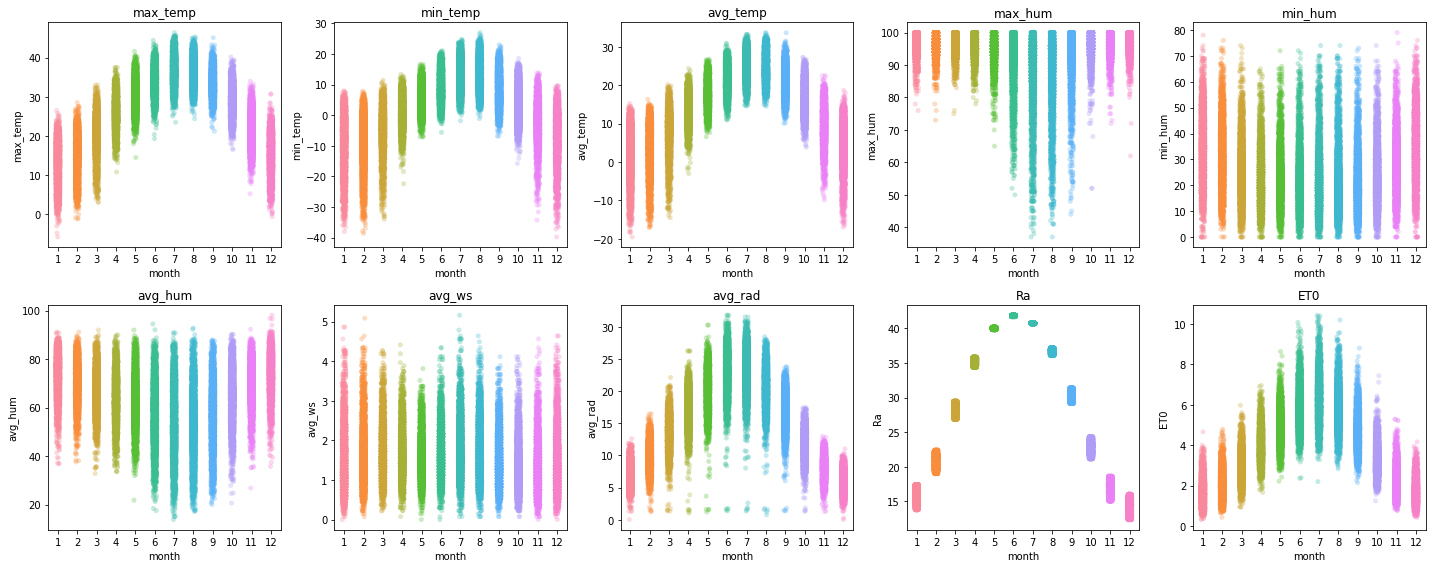

In [14]:
variables = ['max_temp', 'min_temp', 'avg_temp', 'max_hum', 'min_hum', 'avg_hum',
       'avg_ws', 'avg_rad', 'Ra', 'ET0']

fig, axs = plt.subplots(2, 5, figsize=(20, 8), tight_layout=True)

axs = axs.flatten()

for var, ax in zip(variables, axs):
    sns.stripplot(x='month', y=var, data=et_df, ax=ax, alpha=0.3, s=5)
    ax.set_title(var)

#### Comments:
* **Elevation**: Elevation only slightly correlates with temperature, where temperatures expectedly decrease in higher elevations. Average wind speed does not seem to correlate strongly with elevation. A lump of high wind speed values at low elevations is seen, probably in coastal areas.

* **Month**: Month of the year correlates (nonlineary) with many variables as expected due to season change. Extraterrestrial radiation (Ra) is almost completely explained by the month of the year. This is expected because Ra is a function of time of the year and location. Measured average solar radiation, however, is more noisy but still shows correlation with month of the year. The correlation of month of the year with many variables makes it also correlate with reference evapotrabspiration (ET0).

* **Temperature**: Temperature in general is highly correlated with ET0.

* **Average solar radiation**: Measured solar radiation shows a high corelation with ET0.

Plotting violin plots for better visibility of data distribution in different months

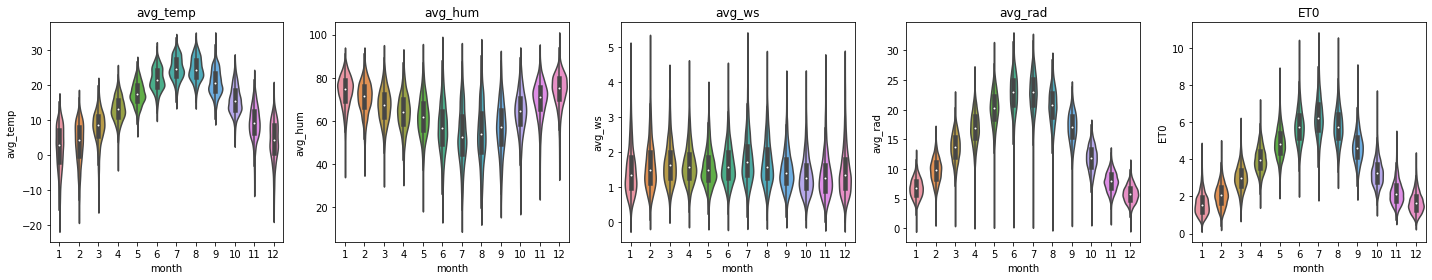

In [15]:
variables = ['avg_temp', 'avg_hum', 'avg_ws', 'avg_rad', 'ET0']

fig, axs = plt.subplots(1, 5, figsize=(20, 4), tight_layout=True)

axs = axs.flatten()

for var, ax in zip(variables, axs):
    sns.violinplot(x='month', y=var, data=et_df, ax=ax)
    ax.set_title(var)

plt.show()

Plotting correlation matrix

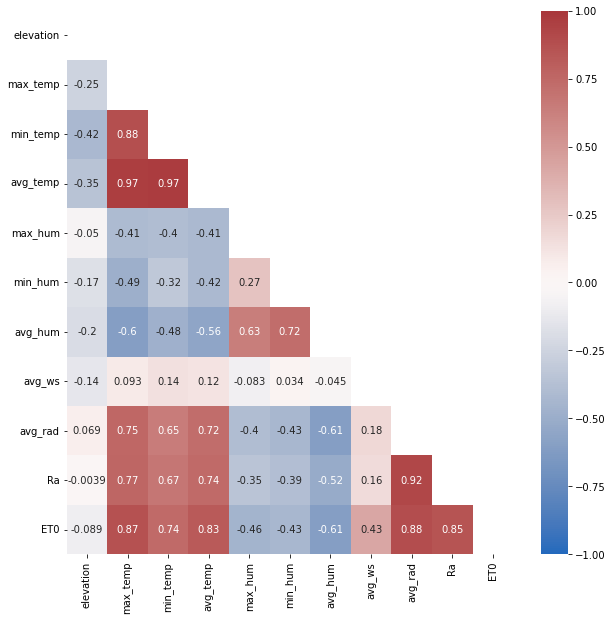

In [16]:
variables = [ 'elevation', 'max_temp', 'min_temp', 'avg_temp', 'max_hum', 'min_hum', 'avg_hum',
       'avg_ws', 'avg_rad', 'Ra', 'ET0']

corr_matrix = et_df[variables].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='vlag', annot=True, vmin=-1, vmax=1, mask=np.triu(np.ones(corr_matrix.shape[0])))
plt.show()

### Variable distributions

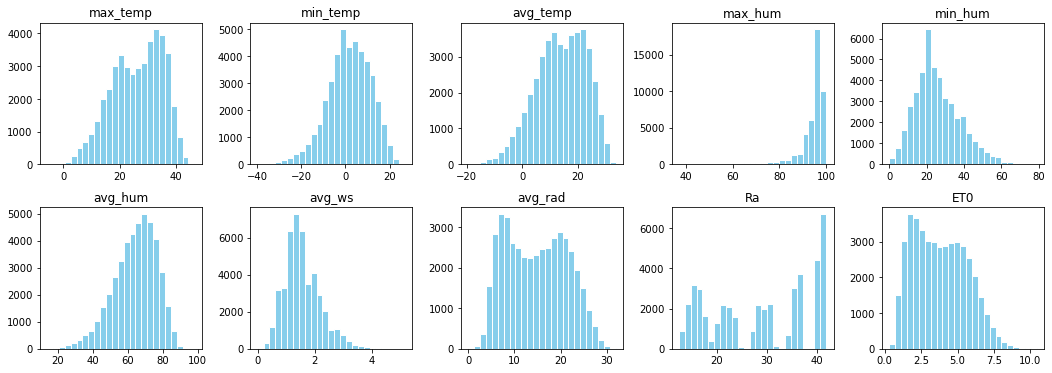

In [18]:
variables = ['max_temp', 'min_temp', 'avg_temp', 'max_hum', 'min_hum', 'avg_hum',
       'avg_ws', 'avg_rad', 'Ra', 'ET0']

et_df[variables].hist(bins=25, figsize=(18, 6), layout=(2, 5), color='skyblue', edgecolor='white', grid=False)

plt.show()

Plotting boxplots

All values are within the acceptable limits.

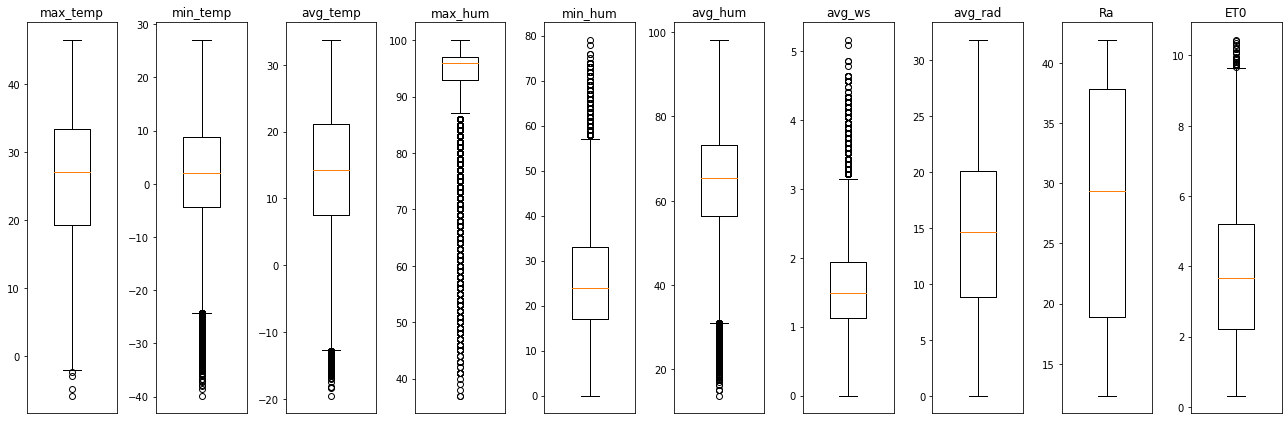

In [19]:
variables = ['max_temp', 'min_temp', 'avg_temp', 'max_hum', 'min_hum', 'avg_hum',
       'avg_ws', 'avg_rad', 'Ra', 'ET0']

fig, axs = plt.subplots(1, 10, figsize=(18, 6), tight_layout=True)
axs = axs.flatten()

for ax, var in zip(axs, variables):
    ax.boxplot(et_df[var], widths=0.4)
    ax.set_xticks([])
    ax.set_title(var)
    
plt.show()

Plotting boxplots by region

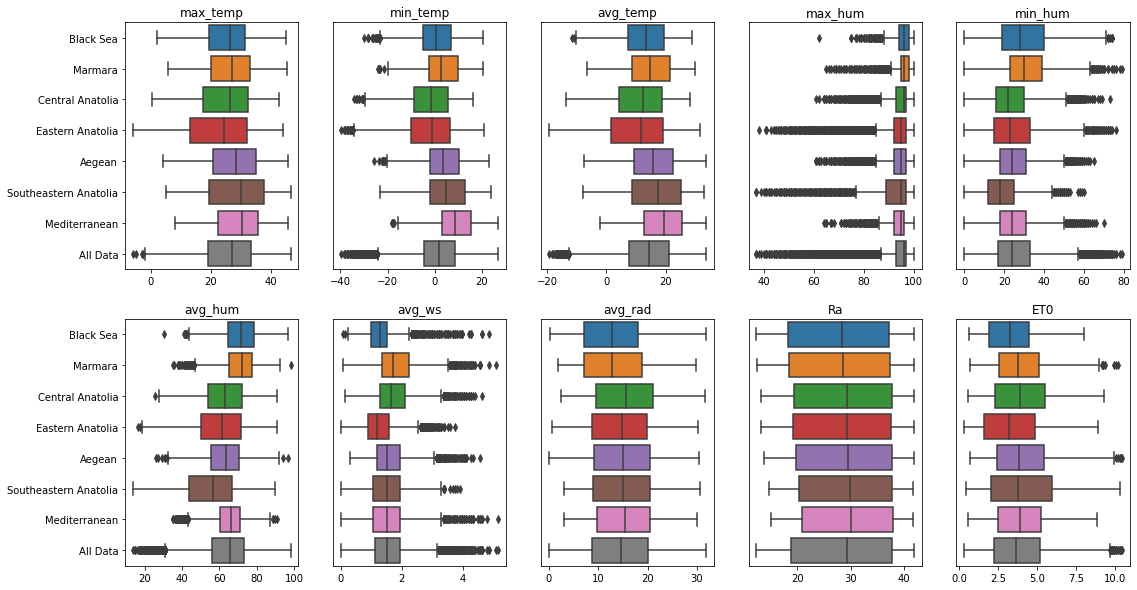

In [20]:
variables = ['max_temp', 'min_temp', 'avg_temp', 'max_hum', 'min_hum', 'avg_hum',
       'avg_ws', 'avg_rad', 'Ra', 'ET0']


fig, axs = plt.subplots(2, 5, figsize=(18, 10))
axs = axs.flatten()

# Concatenating the dataset to plot a box plot for the whole dataset
graph_data = et_df.copy()
graph_data['region'] = 'All Data'
graph_data = pd.concat([et_df, graph_data])

# Axes to include yticklabels
ytick_index = [0, 5]
for i, (ax, var) in enumerate(zip(axs, variables)):
    sns.boxplot(y='region', x=var, orient='h', data=graph_data, ax=ax)

    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(var)
    
    if i not in ytick_index:
        ax.set_yticks([])
plt.show()

del graph_data

Plotting the same graph using a splitted violin plot showing the distribution of each variable in the train and test datasets:

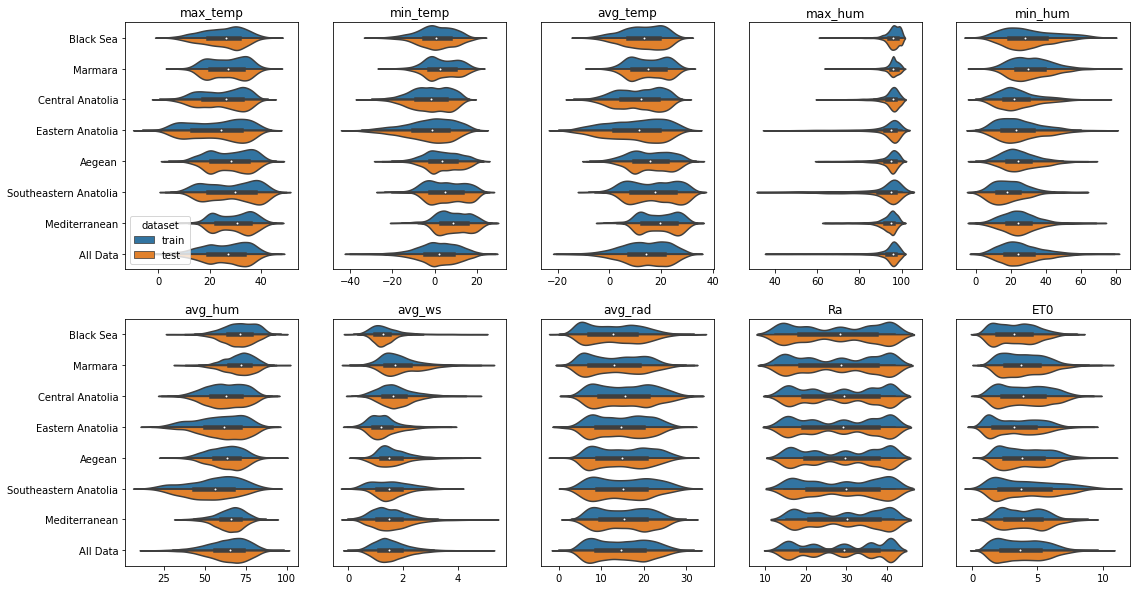

In [21]:
variables = ['max_temp', 'min_temp', 'avg_temp', 'max_hum', 'min_hum', 'avg_hum',
       'avg_ws', 'avg_rad', 'Ra', 'ET0']


fig, axs = plt.subplots(2, 5, figsize=(18, 10))
axs = axs.flatten()

# Concatenating the dataset to plot a box plot for the whole dataset
graph_data = et_df.copy()
graph_data['region'] = 'All Data'
graph_data = pd.concat([et_df, graph_data])

# Axes to include yticklabels
ytick_index = [0, 5]
for i, (ax, var) in enumerate(zip(axs, variables)):
    sns.violinplot(y='region', x=var, orient='h',
                   data=graph_data, ax=ax, hue='dataset', split=True)

    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(var)
    
    if i not in ytick_index:
        ax.set_yticks([])
        
    if i != 0:
        ax.get_legend().remove()
plt.show()

del graph_data

Plotting kernel density estimations (KDE) of each variable in each region for both test and train datasets. The variable distribution in the entire dataset is also plotted for comparison. The train and test variable distributions are almost identical in the entire dataset (see the following plot).

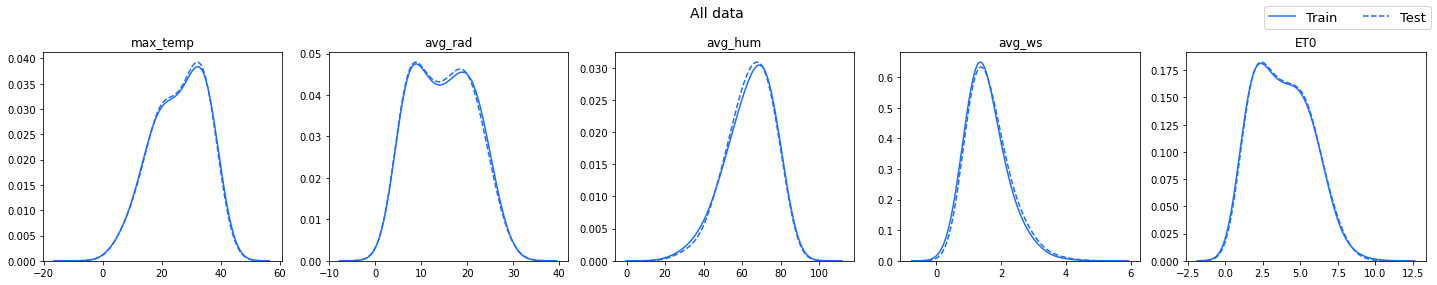

In [7]:
bw = 0.4
variables = ['max_temp', 'avg_rad', 'avg_hum', 'avg_ws', 'ET0']

fig, axs = plt.subplots(nrows=1, ncols=len(variables), figsize=(20, 4), tight_layout=True)

fig.suptitle('All data', fontsize=14)

for variable, ax in zip(variables, axs):
    plot_region_KDE(ax, et_df, variable, region_name=None, bw=bw)

fig.legend(handles=ax.get_lines(),
           labels=['Train', 'Test'],
           ncol=3,
           prop={'size': 13})

plt.show()

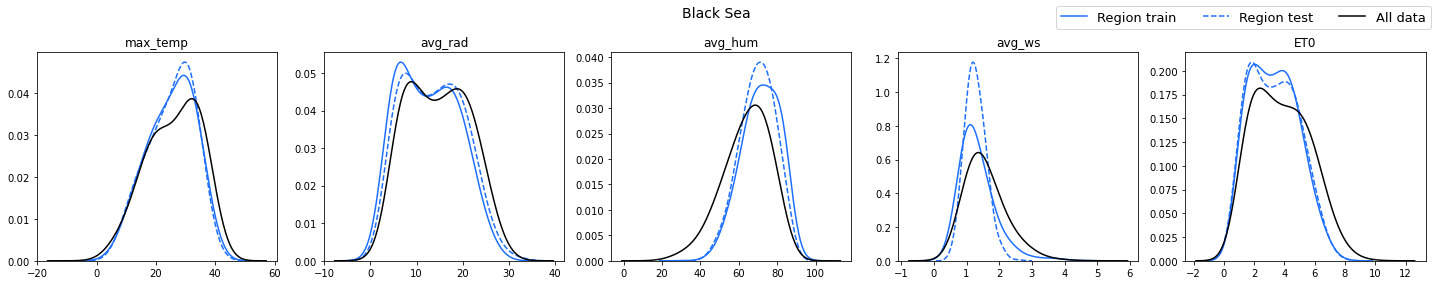

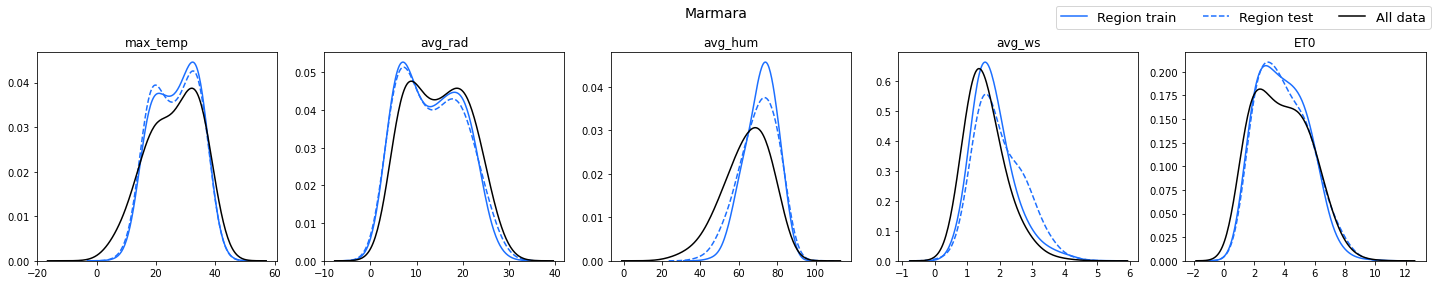

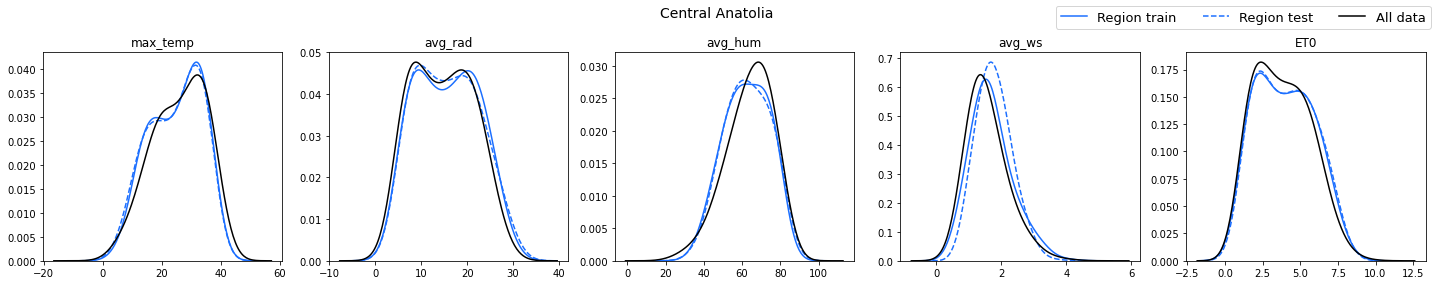

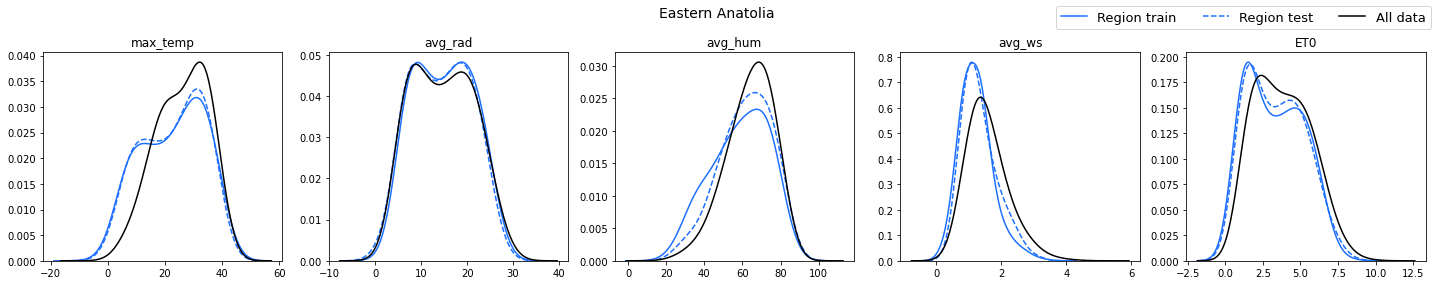

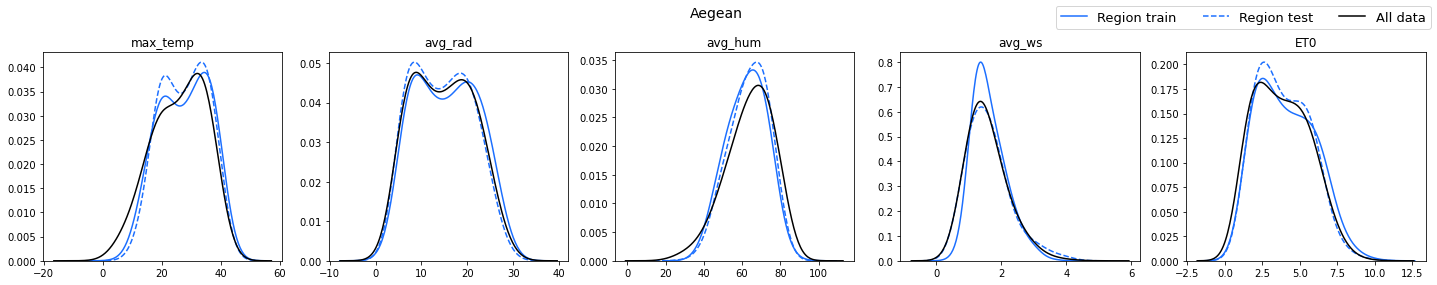

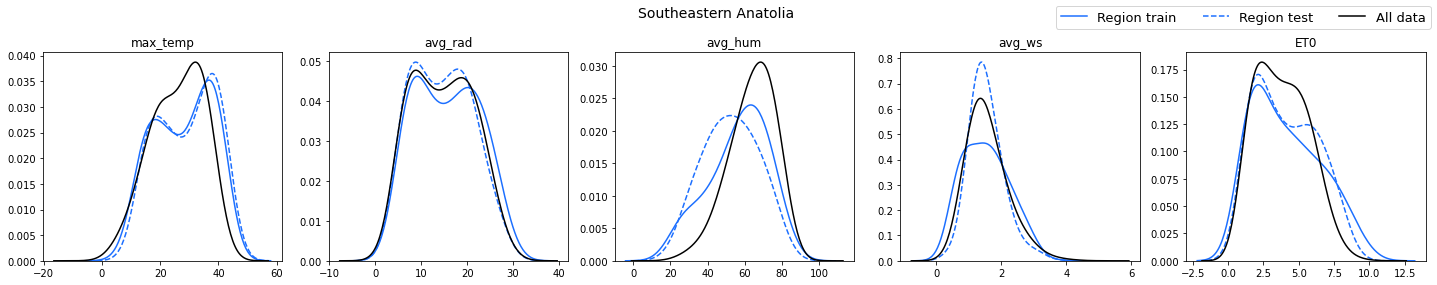

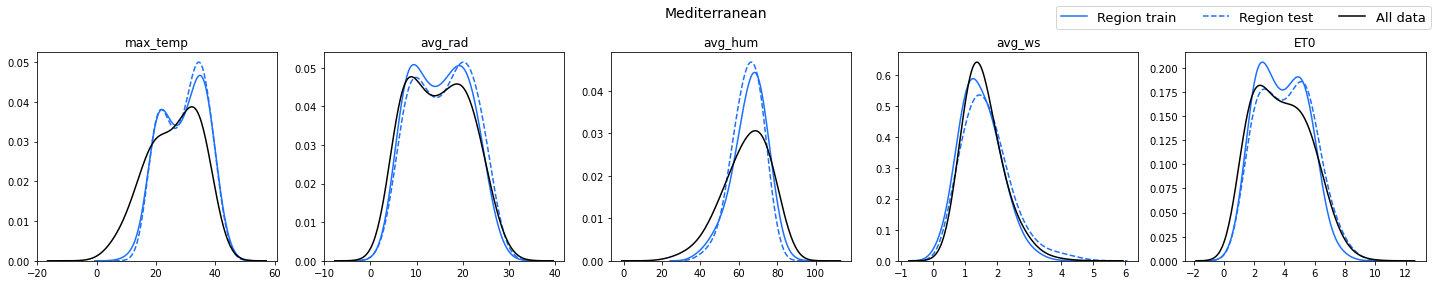

In [23]:
for region_name in et_df['region'].unique():
    
    fig, axs = plt.subplots(nrows=1, ncols=len(variables), figsize=(20, 4), tight_layout=True)

    fig.suptitle(region_name, fontsize=14)
    
    for variable, ax in zip(variables, axs):
        plot_region_KDE(ax, et_df, variable, region_name, bw=bw)

    
    fig.legend(handles=ax.get_lines(),
               labels=['Region train', 'Region test', 'All data'],
               ncol=3,
               prop={'size': 13})
    
    plt.show()

## Plotting station time series

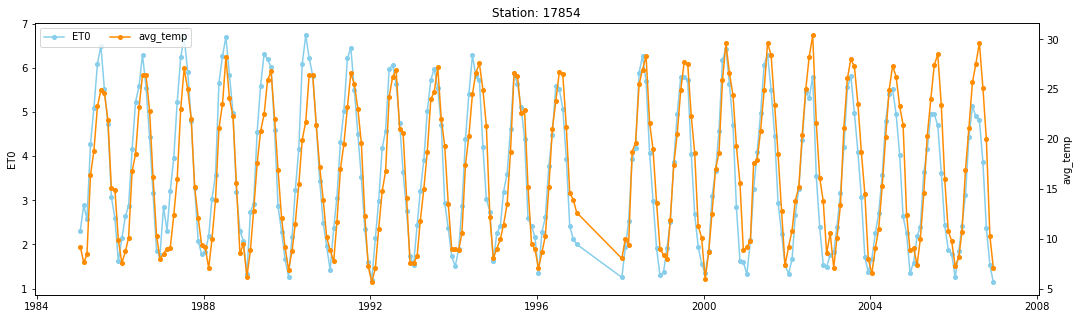

In [8]:
# Choose one or two variables
variables = ['ET0', 'avg_temp']

# Choose a station number
st_num = np.random.choice(st_df['st_num']).squeeze()

ax = plot_station_timeseries(et_df, st_num, variables)
plt.show()